In [1]:
import sys

assert sys.version_info >= (3, 7)
import cv2 as cv
import numpy as np
from util_func import *

In [5]:
def canny_auto(img,method, sigma=0.33):
    """Args:
    img: grayscale
    method: median, triangle, and otsu
    sigma = 0.33(default)"""
    if method =="median":
        Th = np.median(img)
    elif method =="triangle":
        Th = cv.threshold(img, 0, 255, cv.THRESH_TRIANGLE)[0]
    elif method =="otsu":
        Th = cv.threshold(img,0,255,cv.THRESH_OTSU)[0]
    else:
        raise Exception("method specified no available")
    lowThresh = (1-sigma) * Th
    highThresh = (1+sigma) * Th
    return cv.Canny(img, lowThresh,highThresh)

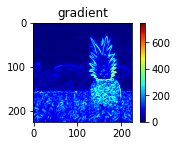

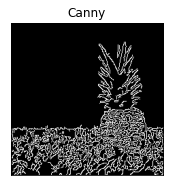

In [2]:
img = cv.imread("images/pineapple.jfif", 0)
sobelx = cv.Sobel(img, cv.CV_32F, 1, 0,ksize=3)
sobelx_8u = cv.convertScaleAbs(sobelx)
sobely = cv.Sobel(img, cv.CV_32F, 0, 1,ksize=3)
sobely_8u = cv.convertScaleAbs(sobely)

gradient = cv.magnitude(sobelx, sobely)
direction = np.arctan2(sobelx, sobely) * (180/ np.pi) % 180
plt.subplot(221),plt.imshow(gradient, cmap="jet"), plt.title("gradient"),plt.colorbar()
plt.show()



blur = cv.GaussianBlur(img,(3,3),0)
LoG = cv.Laplacian(blur, cv.CV_16S)
LoG = cv.convertScaleAbs(LoG)
cv.imshow("grayscale",img)
show_img("Log",LoG)

edge = cv.Canny(img, 100, 300,apertureSize=3)
plt.subplot(122), plt_img(edge,"Canny")
plt.show()

In [3]:
image_path = 'electronic.jfif'
image = cv.imread("images/electronic.jfif")

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 190, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv.contourArea)
x, y, w, h = cv.boundingRect(largest_contour)
cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green rectangle
cv.imshow('White Object Detection', image)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
img = cv.imread("images/clock.jpg")
factor = 300 / img.shape[1]
img = cv.resize(img, None, fx=factor,fy = factor)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.bilateralFilter(gray, 7, 19, 13)
edge = canny_auto(blur,method="otsu")
contours,_= cv.findContours(edge,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours,key=cv.contourArea,reverse=True)[:5]
screen = None
img_copy=img.copy()
for c in cnts:
    peri = cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,0.1*peri, True)
    
    if len(approx) ==4:
        screen = c
        break
        
cv.drawContours(img_copy,[screen],-1,(0,255,0),2)
show_img("contour",img_copy)